# Analyzing the NFL Draft
## by Henry Gorelick

# Overview

## Background

## Issues

## Claim

## Process

## Outcome

## Future Work

## Background
### Draft Rules
<strong>Each year the NFL holds its annual draft. The draft’s basic rules are as follows:</strong>
    <ul>
        <li>Each team receives 1 pick per round</li>
            <ul>
                <li>32 picks per round (+ ~50 compensatory picks)</li>
                <li>7 rounds</li>
                <li>~254 total picks</li>
            </ul>
        <li>Order – reverse standings of previous season</li>
        <li>Teams may pick eligible players to join their team in the upcoming season</li>

## Issues
### Boom or Bust
<ul>
    <li>A player who underperforms relative to his draft position is labeled a “Bust”</li>
    <li>Busts lose games and get people fired</li>
    <li>A good draft is about finding good value</li>
</ul>

## Claim
##### Collegiate performance doesn’t correlate to NFL success
#### Busts
<ul>
    <li>Jamarcus Russell, QB
        <ul><li>2007 <strong>Round 1, Pick 1</strong></li></ul>
    </li>
    <li>Ryan Leaf, QB
        <ul><li>1998 <strong>Round 1, Pick 2</strong></li></ul>
    </li>
    <li>Trent Richardson, RB
        <ul><li>2012 <strong>Round 1, Pick 3</strong></li></ul>
    </li>
    <li>Mark Sanchez, QB
        <ul><li>2009 <strong>Round1, Pick 5</strong></li></ul>
    </li>
</ul>

### Steals
<ul>
    <li>Tom Brady, QB
        <ul><li>2000 <strong>Round 6, Pick 199</strong></li></ul>
    </li>
    <li>Antonio Brown, WR
        <ul><li>2010 <strong>Round 6, Pick 195</strong></li></ul>
    </li>
    <li>Richard Sherman, CB
        <ul><li>2011 <strong>Round 5, Pick 154</strong></li></ul>
    </li>
    <li>Alvin Kamara, RB
        <ul><li>2017 <strong>Round 3, Pick 67</strong></li></ul>
    </li>
</ul>

## Data Collection and Processing

### Gathering Data

Using Python's SQLite3, BeautifulSoup, and Selenium ChromeDriver libraries, I gathered data from www.Pro-Football-Reference.com and www.sports-reference.com/cfb/

### Preprocessing

##### There was a good amount of preprocessing required

<strong>Including:</strong>
<ul>
    <li>Removing players with little to no stats</li>
    <li>Recalculating percetage stats</li>
</ul>

#### Sample Results
<i>You may need to change the db_path to recreate results...</i>

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r'C:\NFLDraftAnalysis\PFR.db')
qbs = pd.read_sql_query("select * from Player_PickVal_Draft_CStats_QBs;", conn)
print("Quarterbacks Drafted between 2004 - 2015 (alphabetical order)")
qbs.head(20)

Quarterbacks Drafted between 2004 - 2015 (alphabetical order)


,pick,name,pos,college,round,award_score,pick_value,games,pass_cmp,pass_att,pass_yds,cmp_percent,yp_cmp,pass_td,pass_int,rush_att,rush_yds
0,164,A.J. McCarron,QB,Alabama,5,0.0,0.000000,49,686,1026,9019,0.668616,13.147230,77,15,3,3
1,163,Aaron Murray,QB,Georgia,5,0.0,0.000000,52,921,1478,13166,0.623139,14.295331,121,41,286,388
2,24,Aaron Rodgers,QB,California,1,20.0,364.307692,25,424,665,5469,0.637594,12.898585,43,13,160,336
3,223,Alex Brink,QB,Washington State,7,0.0,0.000000,42,848,1451,10913,0.584425,12.869104,76,43,246,98
4,1,Alex Smith,QB,Utah,1,3.0,24.278365,25,389,587,5203,0.662692,13.375321,47,8,286,1072
5,198,Andre Woodson,QB,Kentucky,6,0.0,0.000000,44,791,1278,9360,0.618936,11.833123,79,25,5,5
6,1,Andrew Luck,QB,Stanford,1,3.0,33.371875,38,713,1064,9430,0.670113,13.225806,82,22,163,957
7,69,Andrew Walter,QB,Arizona State,3,0.0,0.000000,45,777,1416,10617,0.548729,13.664093,85,36,0,0
8,35,Andy Dalton,QB,TCU,2,3.0,69.795536,50,812,1317,10314,0.616553,12.701970,71,30,413,1611
9,237,B.J. Daniels,QB,South Florida,7,0.0,0.000000,47,649,1132,8433,0.573322,12.993837,52,39,526,2068


In [2]:
conn = sqlite3.connect(r'C:\NFLDraftAnalysis\PFR.db')
qbs = pd.read_sql_query("select * from DraftedPlayers order by av desc;", conn)
print("All Players Drafted between 2004 - 2015 (ordered by Approximate Value, excludes offensive linemen and specialists)")
# see https://www.pro-football-reference.com/blog/indexd961.html?page_id=8061 for AV Method
qbs.head(20)

All Players Drafted between 2004 - 2015 (ordered by Approximate Value, excludes offensive linemen and specialists)


,year,round,pick,name,prof_url,pos,age,drafted_by,college,career_length,av,games_played,games_started,all_pros,pro_bowls,college_stats_link
0,2004,1,4,Philip Rivers,/players/R/RivePh00.htm,QB,22,NYG,North Carolina State,14,134,209,205,0,7,https://www.sports-reference.com/cfb/players/p...
1,2005,1,24,Aaron Rodgers,/players/R/RodgAa00.htm,QB,21,GNB,California,13,128,162,155,2,6,https://www.sports-reference.com/cfb/players/a...
2,2004,1,11,Ben Roethlisberger,/players/R/RoetBe00.htm,QB,22,PIT,Miami (OH),14,120,213,211,0,6,https://www.sports-reference.com/cfb/players/b...
3,2008,1,3,Matt Ryan,/players/R/RyanMa00.htm,QB,23,ATL,Boston Col.,10,120,171,171,1,4,https://www.sports-reference.com/cfb/players/m...
4,2004,1,1,Eli Manning,/players/M/MannEl00.htm,QB,23,SDG,Mississippi,14,112,229,227,0,4,https://www.sports-reference.com/cfb/players/e...
5,2006,1,12,Haloti Ngata,/players/N/NgatHa20.htm,DT,22,BAL,Oregon,12,101,177,173,2,5,https://www.sports-reference.com/cfb/players/h...
6,2004,4,126,Jared Allen,/players/A/AlleJa22.htm,DE,22,KAN,Idaho State,11,99,187,181,4,5,
7,2011,1,1,Cam Newton,/players/N/NewtCa00.htm,QB,22,CAR,Auburn,7,95,122,121,1,3,https://www.sports-reference.com/cfb/players/c...
8,2005,1,1,Alex Smith,/players/S/SmitAl03.htm,QB,21,SFO,Utah,13,93,166,161,0,3,https://www.sports-reference.com/cfb/players/a...
9,2007,1,11,Patrick Willis,/players/W/WillPa98.htm,LB,22,SFO,Mississippi,7,92,112,112,5,7,https://www.sports-reference.com/cfb/players/p...


## Outcome

In the end, I wasn't able to accomplish all of my goals. But, I did get the results I expected!
Using matplotlib, pandas, and sklearn I demonstrate below that a player's collegiate accomplishments do not correlate to their NFL success.

### Results
<i>You may need to change the db_path to recreate results...</i>

In [3]:
from PFRDataAnalysis.Predictor import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

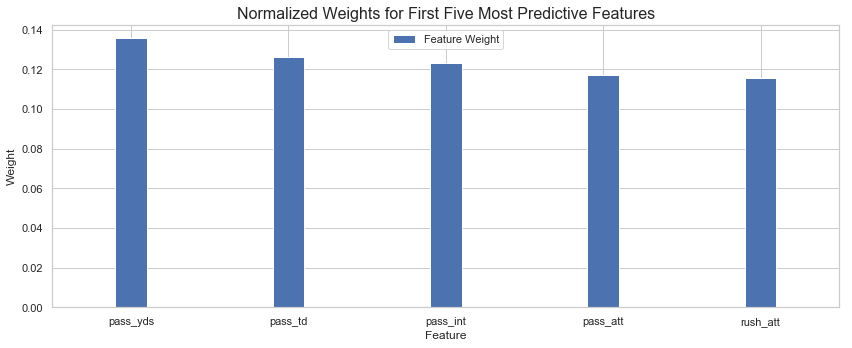

Cam Newton
Actual Pick:  1
Predicted Pick: 3


In [4]:
player = Player("Cam Newton", "QB", "Auburn")
prediction = predict_player_pick(r'C:\NFLDraftAnalysis\PFR.db', player, True)
print(f"{player.name}\n"
      f"Actual Pick:  {prediction[1]}\n"
      f"Predicted Pick: {prediction[0]}")

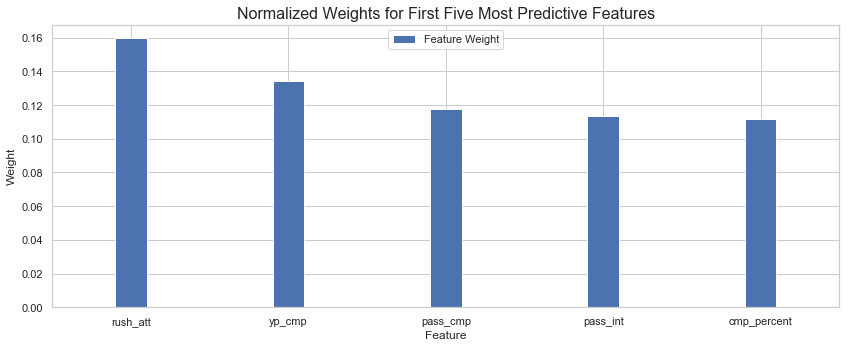

Derek Anderson
Actual Pick:  213
Predicted Pick: 1


In [5]:
player = Player("Derek Anderson", "QB", "Oregon State")
prediction = predict_player_pick(r'C:\NFLDraftAnalysis\PFR.db', player, True)
print(f"{player.name}\n"
      f"Actual Pick:  {prediction[1]}\n"
      f"Predicted Pick: {prediction[0]}")

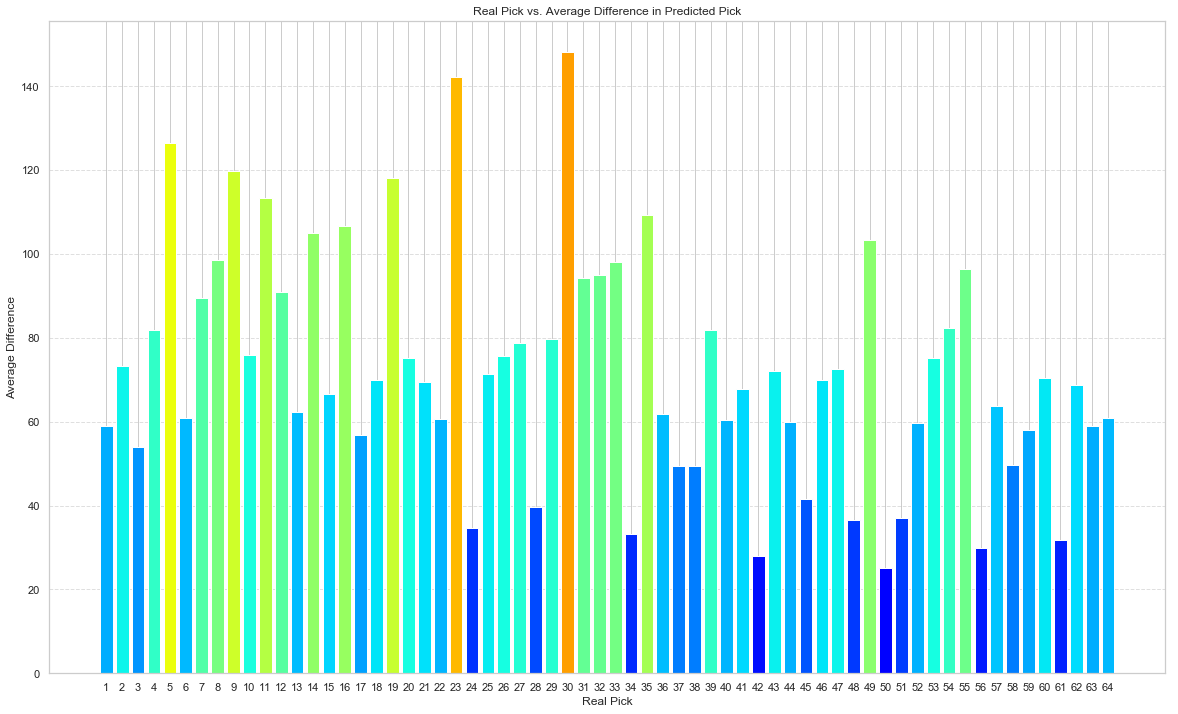

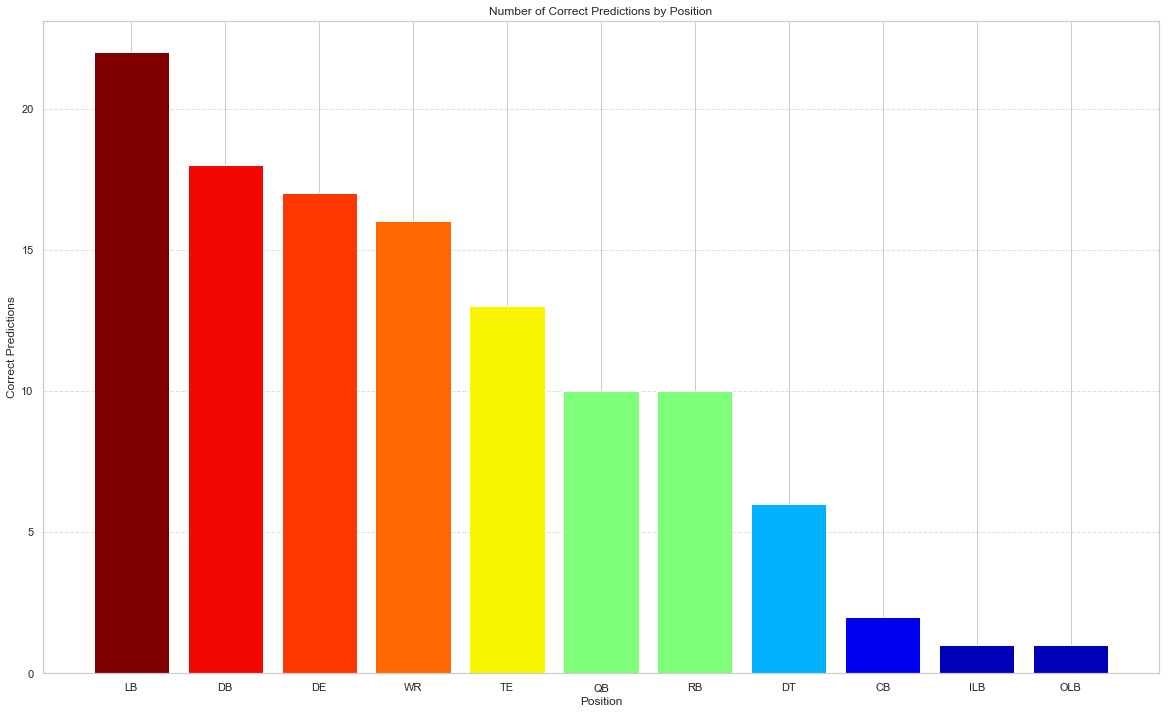

In [6]:
plot_rounds_one_two(r'C:\NFLDraftAnalysis\PFR.db', False)


## Future Work

##### Include NFL Combine Data in training data
I predict this will massively affect the results, and make my prediction model accurate instead of intentionally inaccurate.

##### Use Collegiate Production to Predict NFL Production

##### Include Players Drafted After 2015

##### Reverse Predictions
Predict collegiate stats based on NFL production